<a href="https://colab.research.google.com/github/AkashBhardwaj9078/DL_OpenCv/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

In [ ]:

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.metrics import FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC


In [ ]:
(xtr,ytr),(xts,yts)=cifar10.load_data()


print(xtr.shape,ytr.shape,xts.shape,yts.shape)


print("shape of the images",xtr[0].shape)
print("no of images to be trained",len(xtr))

print("shape of the images",xtr[0].shape)
print("no of images to be tested",len(xts))


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
shape of the images (32, 32, 3)
no of images to be trained 50000
shape of the images (32, 32, 3)
no of images to be tested 10000


In [ ]:
classes=[' airplanes',
 ' cars',
 ' birds',
 ' cats',
 ' deer',
 ' dogs',
 ' frogs',
 ' horses',
 ' ships',
 'trucks']

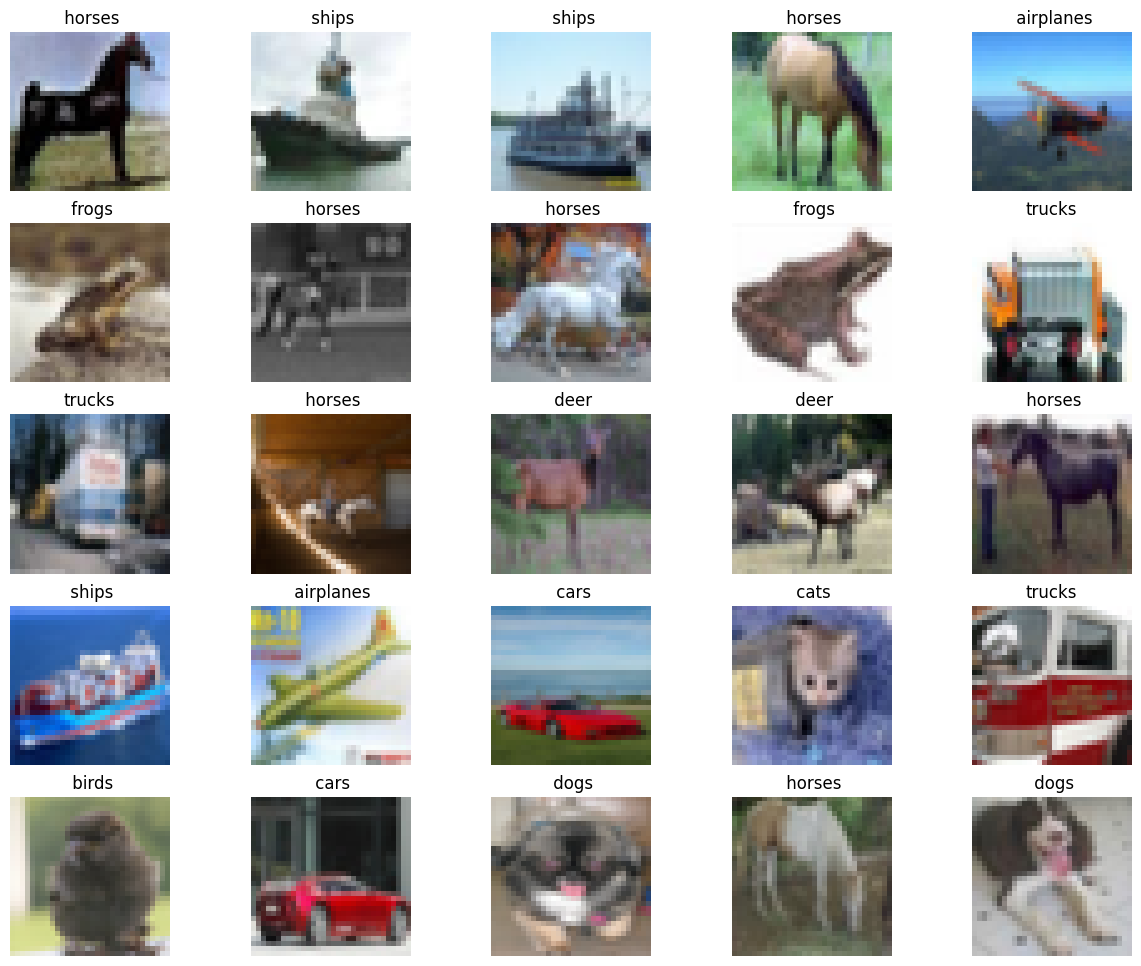

In [ ]:
plt.figure(figsize=(15,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  idx=np.random.randint(0,len(xtr))
  plt.imshow(xtr[idx],cmap="gray")
  plt.title(classes[ytr[idx][0]])
  plt.axis("off")



In [ ]:
# xtr=np.expand_dims(xtr,axis=-1)
# xts=np.expand_dims(xts,axis=-1)
xtr=xtr.astype("float32")/255.0
xts=xts.astype("float32")/255.0


ytr_cat=to_categorical(ytr)
yts_cat=to_categorical(yts)

print(xtr.shape,ytr.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:


model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=xtr.shape[1:], activation='relu',kernel_regularizer=L2(0.001)   ))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=L2(0.001) ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=L2(0.001) ))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=L2(0.001) ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu',kernel_regularizer=L2(0.001) ))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=L2(0.001) ))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=L2(0.001) ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9),
              metrics = ["accuracy"])

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')


train_data=train_datagen.flow(
    xtr,ytr_cat,
    batch_size=32,
    shuffle=True,
    seed=42,

)



In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.2,
    shear_range=0.2,

)

test_data=test_datagen.flow(
    xts,yts_cat,
    batch_size=128,
    shuffle=True,
    seed=43
)

In [ ]:
num_of_classes=10
num_of_classes

10

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# csv_callback = CSVLogger(
#     'logs.csv', separator=',', append=True
# )

es_model=EarlyStopping(

    monitor='accuracy', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [ ]:
import datetime

curr = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
metric_dir = './logs/' + curr + '/metrics'
train_writer = tf.summary.create_file_writer(metric_dir)

# def scheduler(epoch, lr):

#   if epoch <= 5:
#     learning_rate = lr
#   else:
#     learning_rate = lr * tf.math.exp(-0.1)
#     learning_rate = learning_rate.numpy()

#   with train_writer.as_default():
#     tf.summary.scalar('Learning Rate', data = learning_rate, step = epoch)
#   return learning_rate
# scheduler_callback = LearningRateScheduler(scheduler, verbose = 1)

In [ ]:
model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
history=model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[es_model]
)

Epoch 1/20
1563/1563 [==============================] - 61s 39ms/step - loss: 2.1252 - accuracy: 0.1997 - val_loss: 5.2663 - val_accuracy: 0.1318
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.9817 - accuracy: 0.2587 - val_loss: 25.4307 - val_accuracy: 0.1363
Epoch 3/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.9192 - accuracy: 0.2846 - val_loss: 40.8728 - val_accuracy: 0.1329
Epoch 4/20
1563/1563 [==============================] - 63s 40ms/step - loss: 1.8784 - accuracy: 0.3010 - val_loss: 49.6006 - val_accuracy: 0.1308
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.8590 - accuracy: 0.3063 - val_loss: 48.3991 - val_accuracy: 0.1341
Epoch 6/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.8391 - accuracy: 0.3168 - val_loss: 52.3078 - val_accuracy: 0.1424
Epoch 7/20
1563/1563 [==============================] - 57s 37ms/step - loss: 1.8207 - accuracy: 0.3268 - val_loss: 47.

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy']
              )

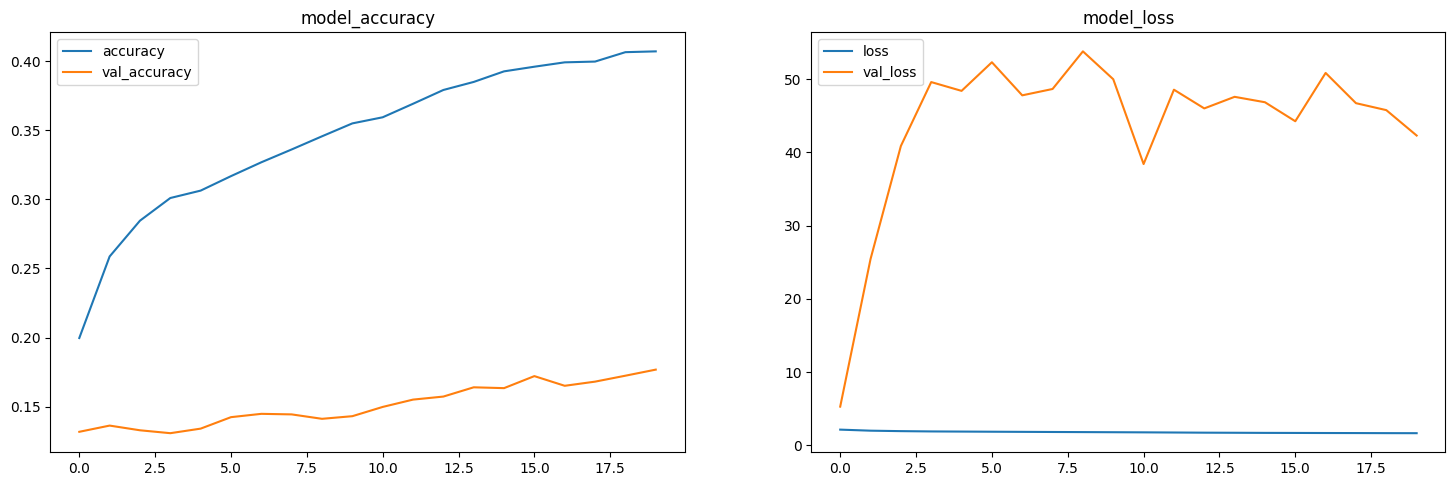

In [ ]:
hist=history


plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title("model_accuracy")
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()




plt.subplot(2,2,2)
plt.title("model_loss")
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()

In [ ]:
score=model.evaluate(xts,yts_cat,verbose=1)
print("test_loss:",score[0])
print("test_accuracy:",score[1])

ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
from  tensorflow.keras.applications.vgg16 import VGG16
vgg=VGG16(weights="imagenet",include_top=False, input_shape=(32,32,3))






58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
y=tf.keras.layers.Input(shape=(32,32,3))

out_vgg = vgg(y)
x=tf.keras.layers.Flatten()(out_vgg)
x=tf.keras.layers.Dense(1024,activation="relu")(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(512,activation="relu")(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(10,activation="softmax")(x)


mod=tf.keras.models.Model(inputs=y,outputs=x)
mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0     

In [ ]:
mod.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy']
              )

In [ ]:
mod.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[es_model]
    ,verbose=1,
    batch_size=32
)

Epoch 1/20
1563/1563 [==============================] - 4225s 3s/step - loss: 2.3047 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/20
 631/1563 [===========>..................] - ETA: 43:16 - loss: 2.3029 - accuracy: 0.1035

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg=VGG16(weights="imagenet",include=False,input_shape=(32,32,3))


In [ ]:
vgg.layers